In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [15]:
path = "./dataset" 
all_files = glob.glob(os.path.join(path, "*_data.csv"))

In [16]:
df_list = []

In [17]:
for filename in all_files:
    # Read the excel file
    temp_df = pd.read_csv(filename)
    
    # Extract city name from filename (e.g., 'Ahmedabad_data.xlsx' -> 'Ahmedabad')
    # This is crucial because individual files might not identify the city
    city_name = os.path.basename(filename).split('_')[0]
    temp_df['City'] = city_name
    
    df_list.append(temp_df)

In [18]:
df = pd.concat(df_list, ignore_index=True)

# 4. Check the result
print(f"Total Rows: {df.shape[0]}")
print(f"Cities Found: {df['City'].unique()}")
df.head()

Total Rows: 29531
Cities Found: ['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [19]:
df.shape

(29531, 16)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [21]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [22]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [23]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

In [24]:
df.sort_values(by=['City', 'Date'], inplace=True)


In [26]:
df = df.set_index(['City', 'Date']).sort_index()

In [27]:
df = df.groupby(level=0).ffill()

# Reset index to bring 'City' and 'Date' back as regular columns
df = df.reset_index()

In [28]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Apply fillna ONLY to those columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [29]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    1841
dtype: int64

In [30]:
df["AQI_Bucket"]

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
29526            Good
29527    Satisfactory
29528    Satisfactory
29529    Satisfactory
29530            Good
Name: AQI_Bucket, Length: 29531, dtype: object

In [31]:
df["AQI_Bucket"].value_counts()

AQI_Bucket
Moderate        9610
Satisfactory    8954
Poor            3108
Very Poor       3018
Good            1588
Severe          1412
Name: count, dtype: int64

In [32]:
df["AQI_Bucket"].fillna("Moderate", inplace=True)

In [33]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [34]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Year          0
Month         0
dtype: int64

In [35]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month
count,29531,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,2018-05-14 05:40:15.807118080,68.561133,117.756503,17.580782,27.435094,33.722669,25.430433,2.293090,16.037328,34.085352,3.489183,8.121818,2.724652,168.916143,2017.887914,6.267143
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,2015.000000,1.000000
25%,2017-04-16 00:00:00,30.000000,73.540000,5.930000,11.660000,13.710000,11.250000,0.500000,5.760000,18.870000,0.150000,0.780000,0.670000,84.000000,2017.000000,3.000000
50%,2018-08-05 00:00:00,53.090000,117.756503,10.130000,21.420000,24.850000,25.430433,0.910000,9.680000,31.810000,1.410000,3.900000,2.724652,126.000000,2018.000000,6.000000
75%,2019-09-03 00:00:00,78.620000,118.495000,18.560000,35.030000,38.660000,25.430433,1.490000,16.037328,44.215000,3.489183,8.121818,2.724652,205.000000,2019.000000,9.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,2020.000000,12.000000
std,NaN,63.419240,75.396113,23.169086,23.528719,33.491016,24.910623,6.824219,20.491878,21.622889,15.954202,17.641711,4.855748,136.389071,1.533783,3.431974


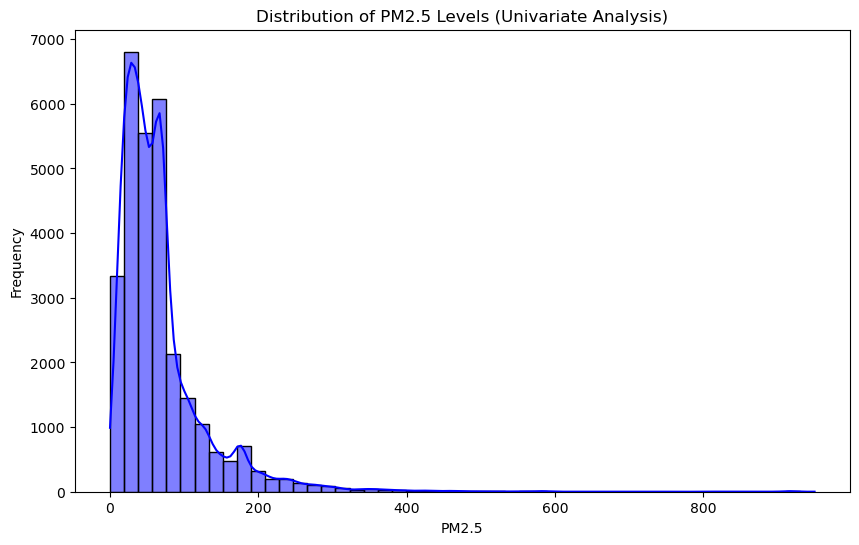

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['PM2.5'], bins=50, kde=True, color='blue')
plt.title('Distribution of PM2.5 Levels (Univariate Analysis)')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()

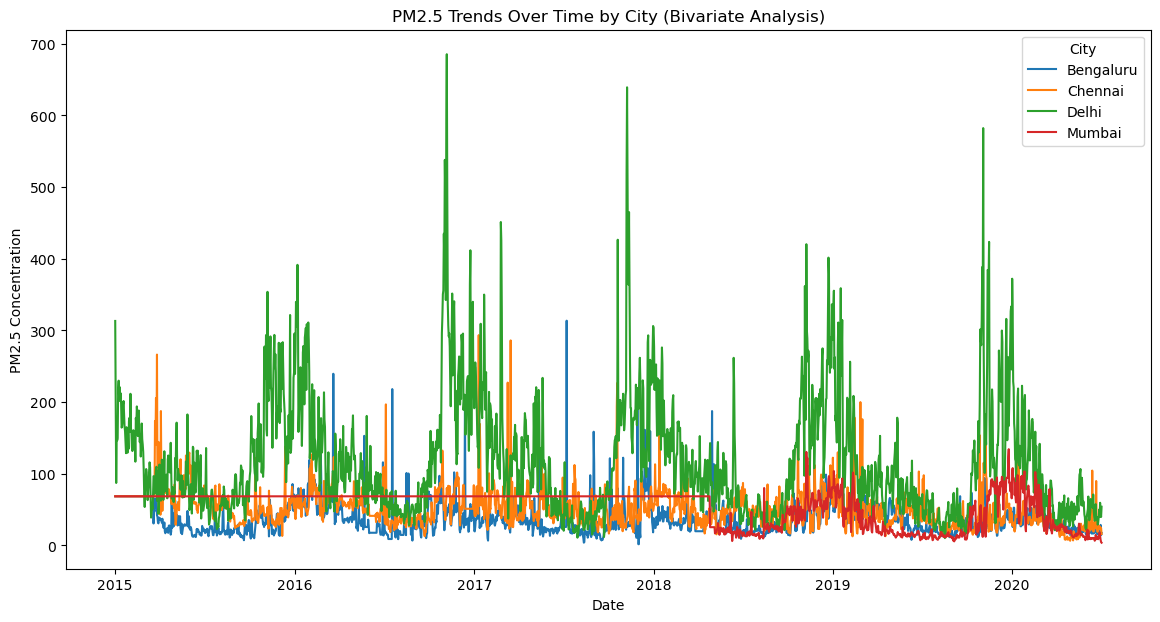

In [37]:
# Select top cities for clearer comparison
target_cities = ['Delhi', 'Bengaluru', 'Mumbai', 'Chennai']
city_subset = df[df['City'].isin(target_cities)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=city_subset, x='Date', y='PM2.5', hue='City')
plt.title('PM2.5 Trends Over Time by City (Bivariate Analysis)')
plt.ylabel('PM2.5 Concentration')
plt.xlabel('Date')
plt.legend(title='City')
plt.show()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
0,Ahmedabad,2015-01-01,68.561133,117.756503,0.92,18.22,17.15,25.430433,0.92,27.64,133.36,0.00,0.02,0.00,168.916143,Moderate,2015,1
1,Ahmedabad,2015-01-02,68.561133,117.756503,0.97,15.69,16.46,25.430433,0.97,24.55,34.06,3.68,5.50,3.77,168.916143,Moderate,2015,1
2,Ahmedabad,2015-01-03,68.561133,117.756503,17.40,19.30,29.70,25.430433,17.40,29.07,30.70,6.80,16.40,2.25,168.916143,Moderate,2015,1
3,Ahmedabad,2015-01-04,68.561133,117.756503,1.70,18.48,17.97,25.430433,1.70,18.59,36.08,4.43,10.14,1.00,168.916143,Moderate,2015,1
4,Ahmedabad,2015-01-05,68.561133,117.756503,22.10,21.42,37.76,25.430433,22.10,39.33,39.31,7.01,18.89,2.78,168.916143,Moderate,2015,1


In [39]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
0,Ahmedabad,2015-01-01,68.561133,117.756503,0.92,18.22,17.15,25.430433,0.92,27.64,133.36,0.00,0.02,0.00,168.916143,Moderate,2015,1
1,Ahmedabad,2015-01-02,68.561133,117.756503,0.97,15.69,16.46,25.430433,0.97,24.55,34.06,3.68,5.50,3.77,168.916143,Moderate,2015,1
2,Ahmedabad,2015-01-03,68.561133,117.756503,17.40,19.30,29.70,25.430433,17.40,29.07,30.70,6.80,16.40,2.25,168.916143,Moderate,2015,1
3,Ahmedabad,2015-01-04,68.561133,117.756503,1.70,18.48,17.97,25.430433,1.70,18.59,36.08,4.43,10.14,1.00,168.916143,Moderate,2015,1
4,Ahmedabad,2015-01-05,68.561133,117.756503,22.10,21.42,37.76,25.430433,22.10,39.33,39.31,7.01,18.89,2.78,168.916143,Moderate,2015,1


In [40]:
# Select main pollutants for analysis
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

# Display descriptive stats
# Transpose (.T) makes it easier to read
print("Statistical Summary of Key Pollutants:")
display(df[pollutants].describe().T)

Statistical Summary of Key Pollutants:


,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,68.561133,63.419240,0.04,30.00,53.090000,78.620000,949.99
PM10,29531.0,117.756503,75.396113,0.01,73.54,117.756503,118.495000,1000.00
NO2,29531.0,27.435094,23.528719,0.01,11.66,21.420000,35.030000,362.21
CO,29531.0,2.293090,6.824219,0.00,0.50,0.910000,1.490000,175.81
SO2,29531.0,16.037328,20.491878,0.01,5.76,9.680000,16.037328,193.86
O3,29531.0,34.085352,21.622889,0.01,18.87,31.810000,44.215000,257.73


Generating Univariate Plots...


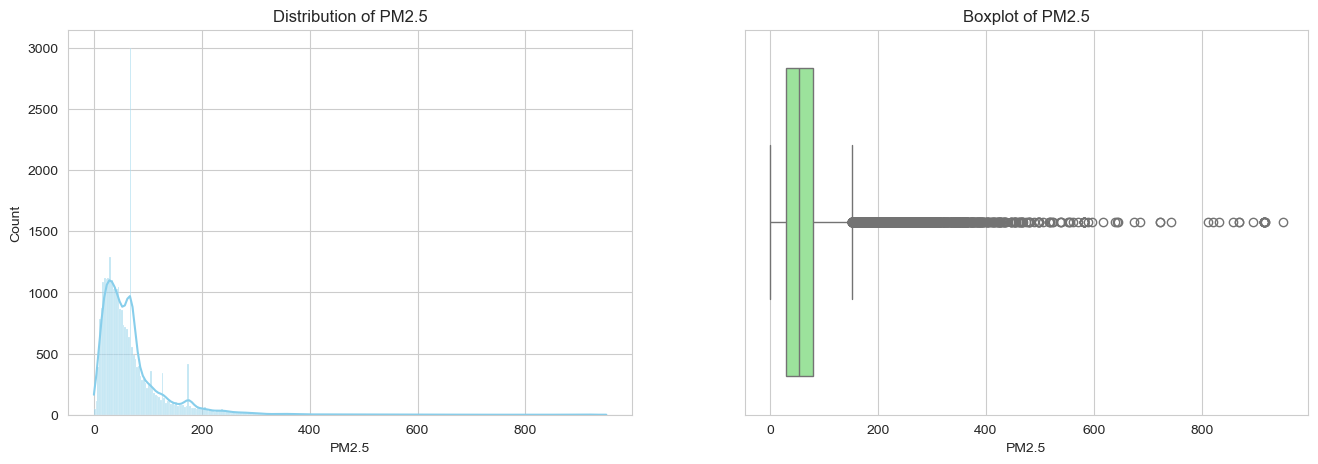

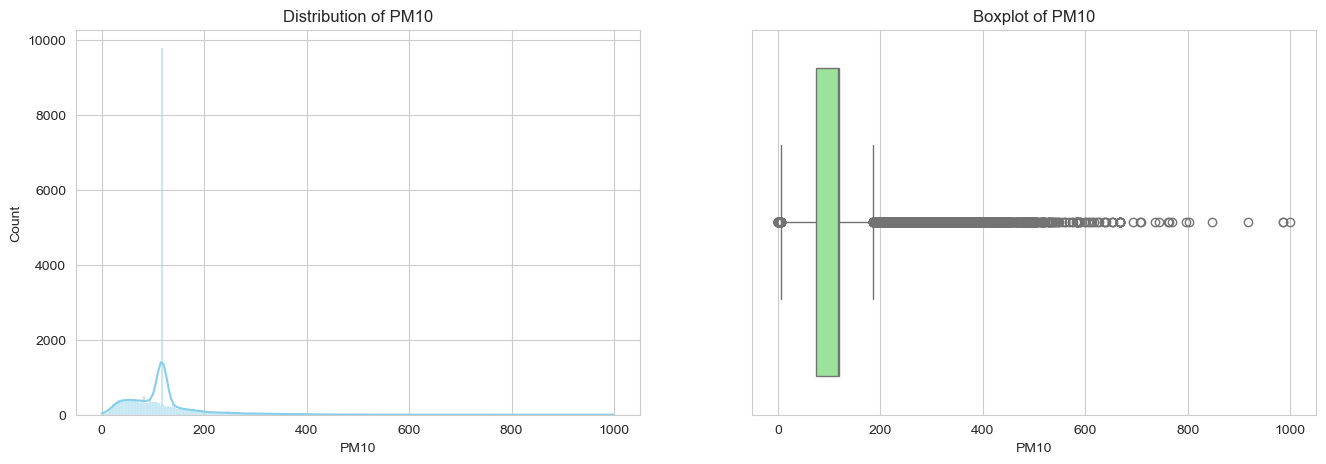

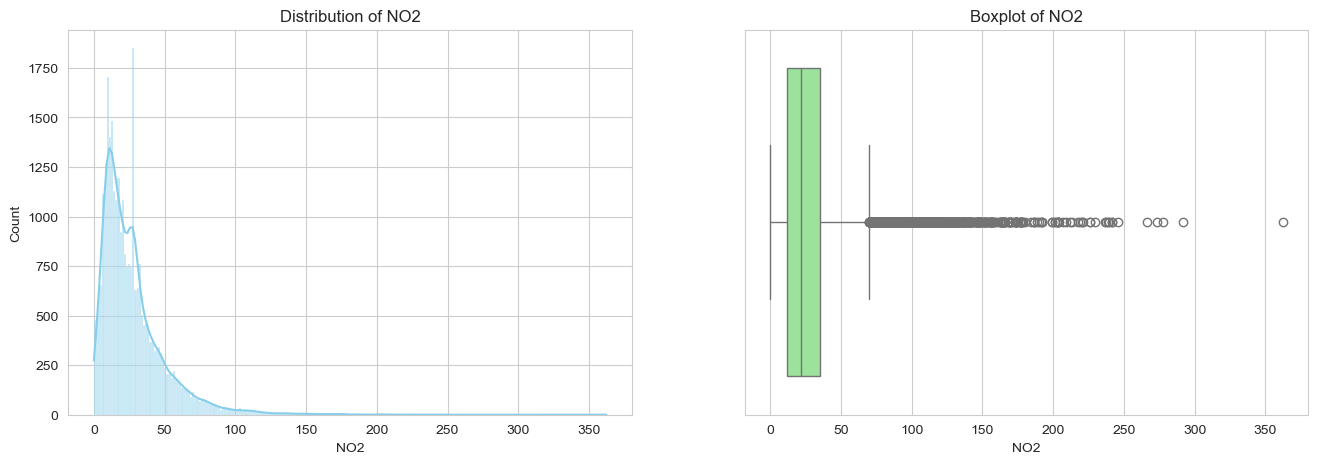

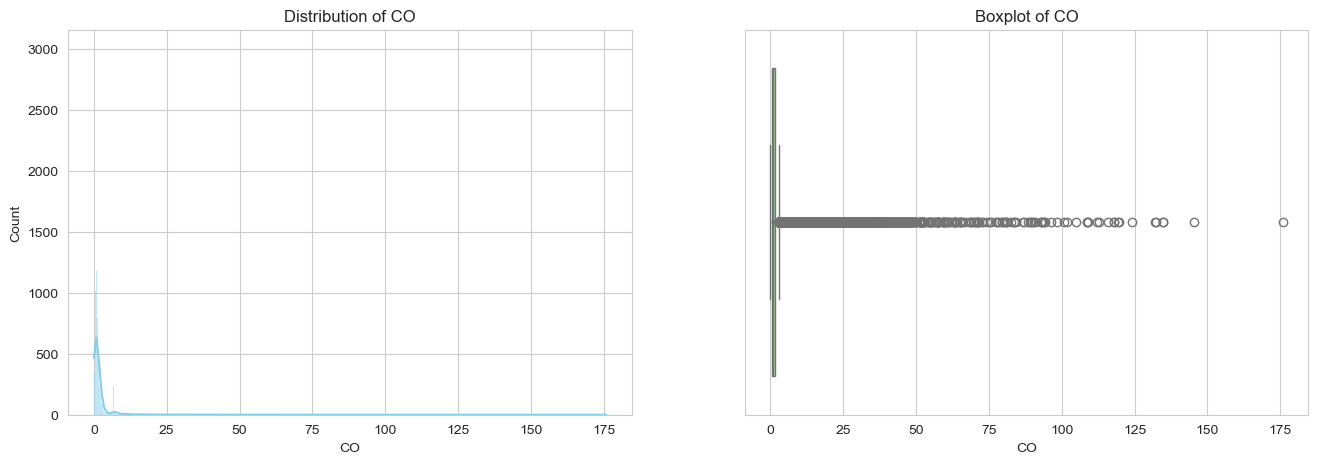

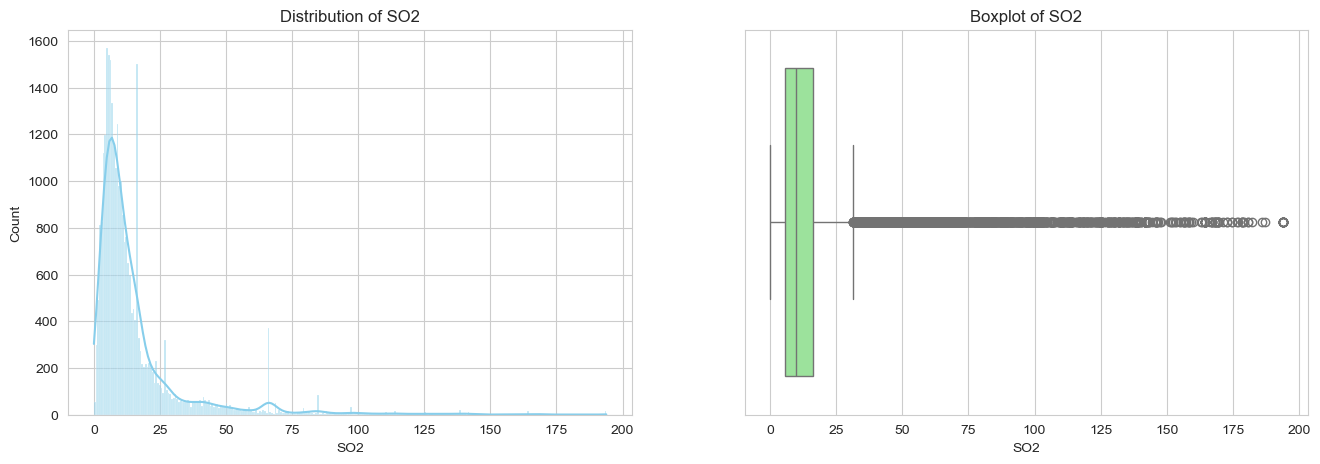

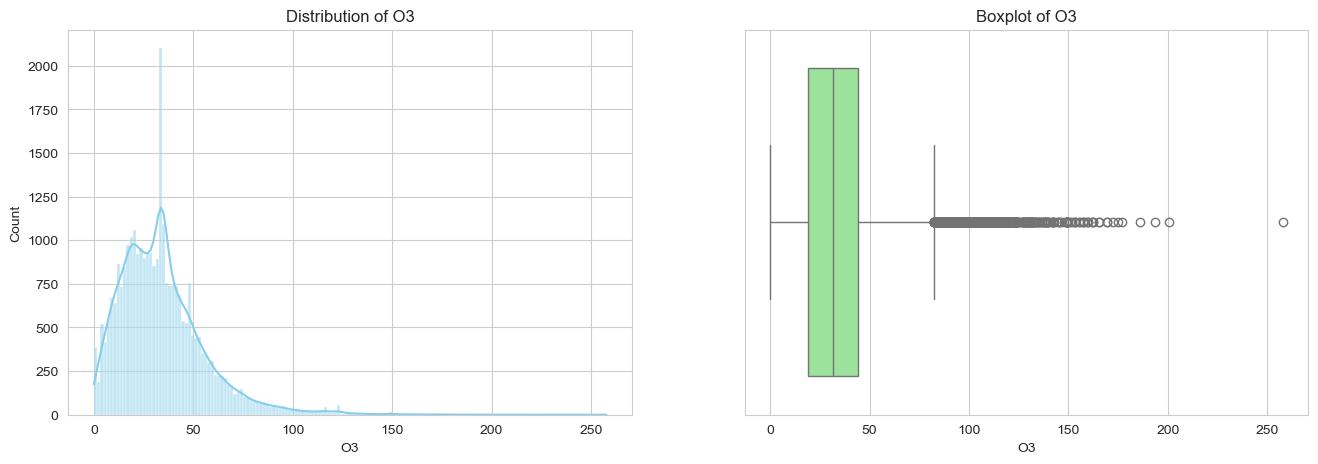

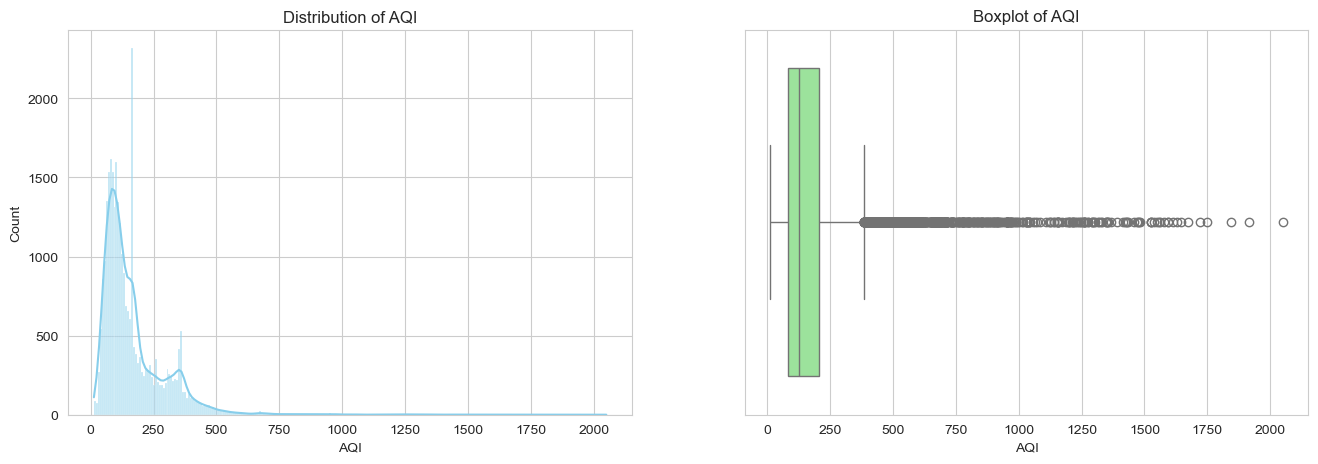

Generating Bivariate Plots...


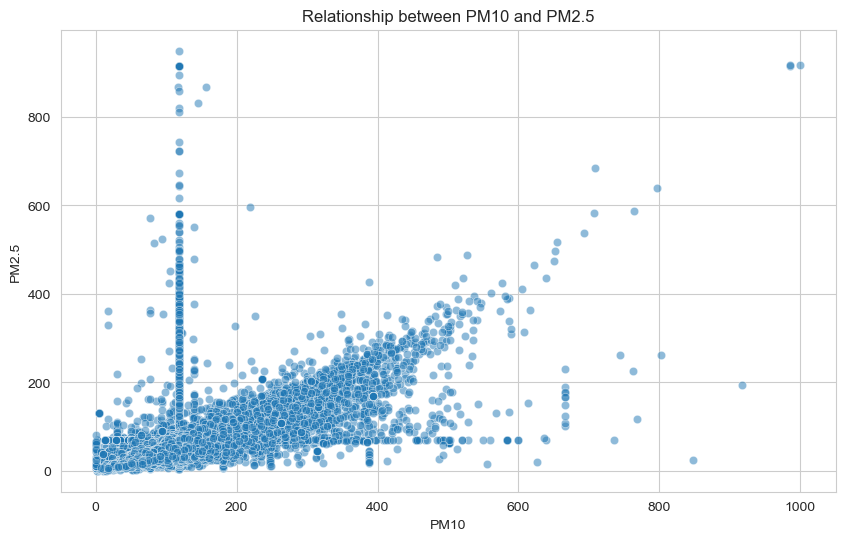

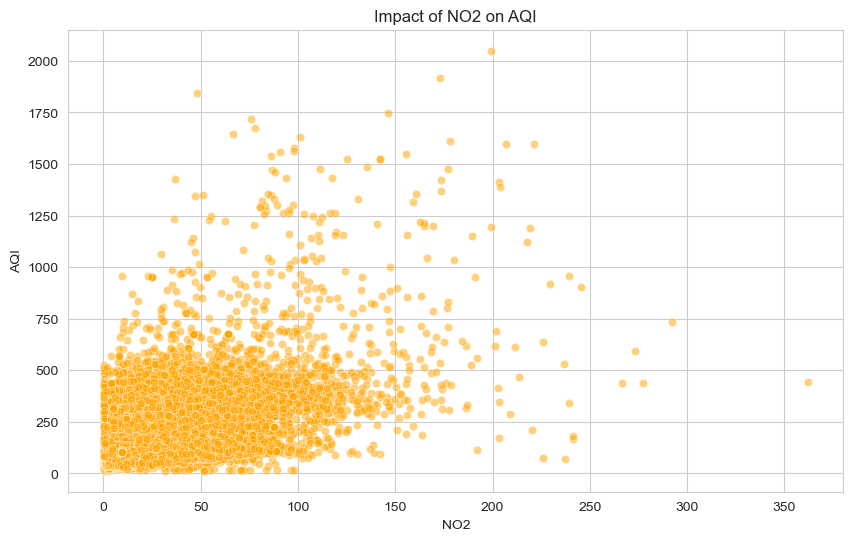

C:\Users\{ AZAN Laptops }\AppData\Local\Temp\ipykernel_1292\2687575993.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_aqi.values, y=city_aqi.index, palette='viridis')


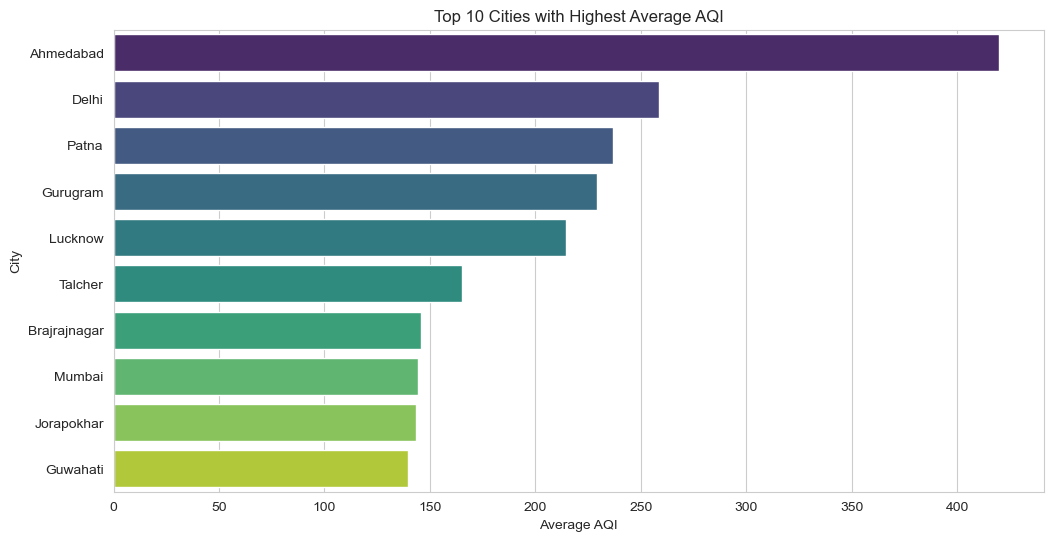

C:\Users\{ AZAN Laptops }\AppData\Local\Temp\ipykernel_1292\2687575993.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='PM2.5', data=df, estimator='mean', ci=None, marker='o')


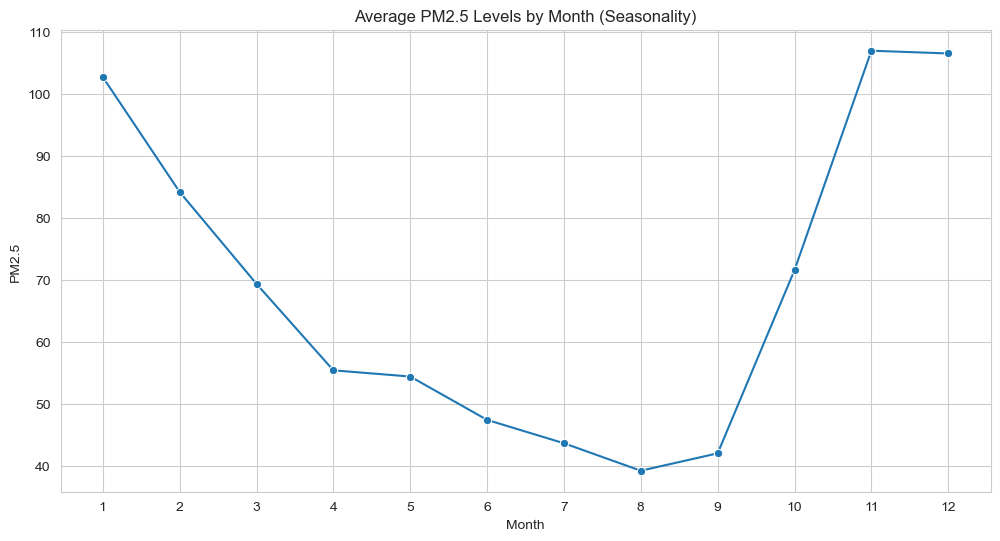

Generating Correlation Heatmap...


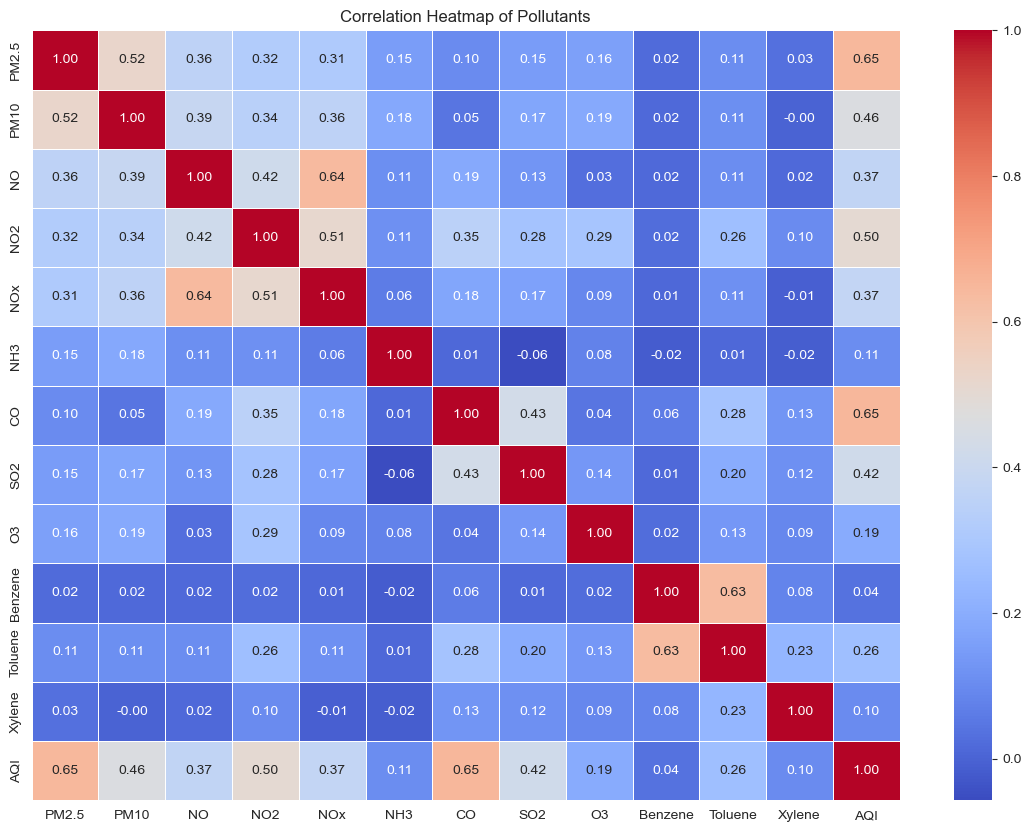

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Define key variables for analysis
key_pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']

# ---------------------------------------------------------
# 1. UNIVARIATE ANALYSIS (Distributions and Outliers)
# ---------------------------------------------------------
print("Generating Univariate Plots...")

for col in key_pollutants:
    if col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        
        # Histogram with KDE
        sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Distribution of {col}')
        
        # Boxplot for outlier detection
        sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Boxplot of {col}')
        
        plt.show()

# ---------------------------------------------------------
# 2. BIVARIATE ANALYSIS (Relationships between variables)
# ---------------------------------------------------------
print("Generating Bivariate Plots...")

# Scatter Plot: PM2.5 vs PM10 (Check linearity)
if 'PM10' in df.columns and 'PM2.5' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PM10', y='PM2.5', data=df, alpha=0.5)
    plt.title('Relationship between PM10 and PM2.5')
    plt.show()

# Scatter Plot: AQI vs NO2
if 'AQI' in df.columns and 'NO2' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='NO2', y='AQI', data=df, alpha=0.5, color='orange')
    plt.title('Impact of NO2 on AQI')
    plt.show()

# Bar Plot: Average AQI by City (Top 10 Most Polluted)
if 'City' in df.columns and 'AQI' in df.columns:
    city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=city_aqi.values, y=city_aqi.index, palette='viridis')
    plt.title('Top 10 Cities with Highest Average AQI')
    plt.xlabel('Average AQI')
    plt.show()

# Line Plot: Monthly Pollution Trends (Seasonality)
if 'Month' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Month', y='PM2.5', data=df, estimator='mean', ci=None, marker='o')
    plt.title('Average PM2.5 Levels by Month (Seasonality)')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

# ---------------------------------------------------------
# 3. MULTIVARIATE ANALYSIS (Correlation Matrix)
# ---------------------------------------------------------
print("Generating Correlation Heatmap...")

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 10))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Pollutants')
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
 16  Year        29531 non-

In [43]:
df.to_csv("cleaned_air_quality_data.csv", index=False)